<a href="https://colab.research.google.com/github/venkatesh-manikumar/Datascience-Assignments/blob/main/Loan_Default_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
from google.colab import drive
#drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/DataScience/Loan_Default.csv')

**Numerical features**

In [154]:
data.select_dtypes(include = np.number).head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,2019,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,2019,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,2019,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,2019,456500,4.25,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,2019,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


**Categorical features**

In [155]:
data.select_dtypes(include = 'object').head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


In [156]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [158]:
data.shape

(148670, 34)

**Upfront_charges , rate_of_interest and Interest_rate_spread	have > 20 % missing data**

In [159]:
total = data.shape[0]
x = data.isna().sum().sort_values(ascending = False).apply(lambda x:(x/total)*100).reset_index().set_axis(['columns','missing_percentage'], axis="columns")
x[x.missing_percentage > 0]

,columns,missing_percentage
0,Upfront_charges,26.664425
1,Interest_rate_spread,24.644515
2,rate_of_interest,24.509989
3,dtir1,16.224524
4,LTV,10.155378
5,property_value,10.155378
6,income,6.154571
7,loan_limit,2.249277
8,approv_in_adv,0.610749
9,submission_of_application,0.134526


# `Handling missing values for Numerical features`

**ID - Just a identifier data** - No missing data

In [160]:
data['ID'].nunique()

148670

**Year - Data is based on the year 2019** -  No missing data



In [161]:
data['year'].nunique() , data['year'].unique() , data['ID'].count()

(1, array([2019]), 148670)

**loan_amount**- No missing data

In [162]:
data['loan_amount'].isna().sum()

0

<Axes: >

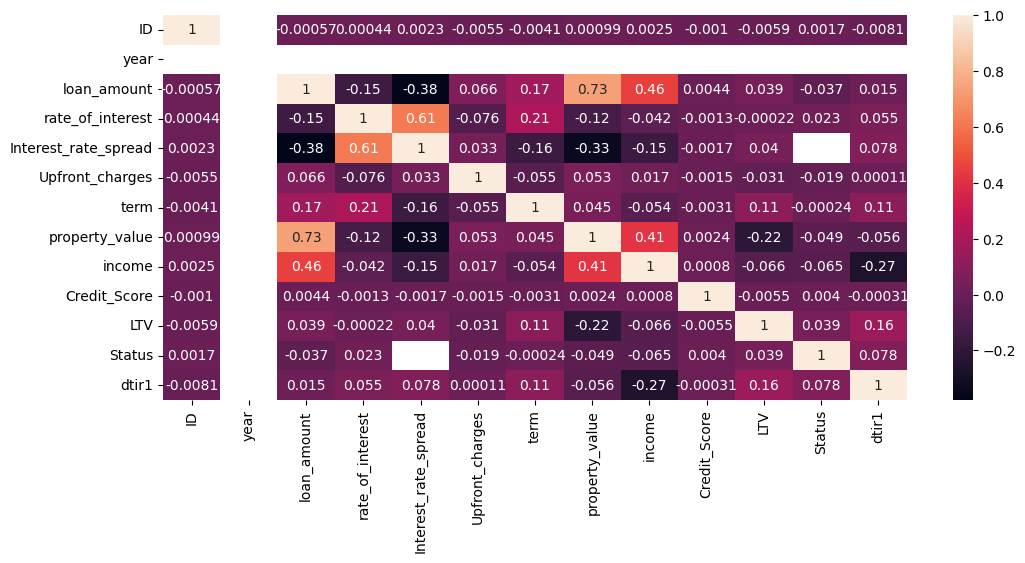

In [163]:

plt.figure(figsize=(12,5))
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot=True)

**'rate_of_interest' and 'Interest_rate_spread' having high corelation , hence missing values are imputed using nearest neighbours**

In [164]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=3)

In [165]:
data_imputation_roi_irs = data[['rate_of_interest','Interest_rate_spread']]
impute.fit(data_imputation_roi_irs)
data_imputation_roi_irs_knn = impute.transform(data_imputation_roi_irs)
data_imputation_roi_irs_knn_result = pd.DataFrame(data_imputation_roi_irs_knn,columns=data_imputation_roi_irs.columns)


In [166]:
for i in data_imputation_roi_irs.columns:
  data[i]=data_imputation_roi_irs_knn_result[i]
  print(i,data_imputation_roi_irs_knn_result[i].isna().sum())

data_imputation_roi_irs_knn_result.head()

rate_of_interest 0
Interest_rate_spread 0


,rate_of_interest,Interest_rate_spread
0,4.045476,0.441656
1,4.045476,0.441656
2,4.560000,0.200000
3,4.250000,0.681000
4,4.000000,0.304200


**'proprty_value' 'Loan_amount' and 'Income' having high co-relation , hence missing values are imputed using nearest neighbours**

In [167]:
data_imputation_prv_inc = data[['property_value','income','loan_amount']]
impute.fit(data_imputation_prv_inc)
data_imputation_prv_inc_knn = impute.transform(data_imputation_prv_inc)
data_imputation_prv_inc_knn_result = pd.DataFrame(data_imputation_prv_inc_knn,columns=data_imputation_prv_inc.columns)

for i in data_imputation_prv_inc.columns:
  data[i]=data_imputation_prv_inc_knn_result[i]
  print(i,data_imputation_prv_inc_knn_result[i].isna().sum())

data_imputation_prv_inc_knn_result.head()

property_value 0
income 0
loan_amount 0


,property_value,income,loan_amount
0,118000.0,1740.0,116500.0
1,268000.0,4980.0,206500.0
2,508000.0,9480.0,406500.0
3,658000.0,11880.0,456500.0
4,758000.0,10440.0,696500.0


**Upfront_charges is dependent on property_value**



In [168]:
condition = ~(data.Upfront_charges.isnull()) & ~(data.property_value.isnull())
upfront_charges_percentage = data[condition][['Upfront_charges','property_value']]
upfront_charges_percentage['upfront_charges_percent'] = (upfront_charges_percentage.Upfront_charges / upfront_charges_percentage.property_value) * 100

upfront_charges_percentage['upfront_charges_percent'].min() , upfront_charges_percentage['upfront_charges_percent'].median() , upfront_charges_percentage['upfront_charges_percent'].max()

(0.0, 0.6981880970788006, 4.980763157894737)

In [169]:
data['Upfront_charges'] = data['Upfront_charges'].fillna(data['loan_amount'] * upfront_charges_percentage['upfront_charges_percent'].min())
data.Upfront_charges.isna().sum()

0

**LTV(Loan-to-value ratio) = loan_amount / property_value**

In [170]:
data['LTV'] = data['LTV'].fillna((data['loan_amount']/data['property_value'])*100)
data[data.LTV > 100][['LTV','loan_amount','property_value']]
data.LTV.isna().sum()

0

**loan_limit - Have missing data**

*   CF - Conforming - Less interest rates , Less amount
*   NCF - Non-conforming - High interest rates , Higher amount

In [171]:
data['loan_limit'].fillna('-1',inplace = True)
data['loan_limit'].value_counts()


cf     135348
ncf      9978
-1       3344
Name: loan_limit, dtype: int64

**Loan amount (Min,Max,Median) for missing Loan_limit values resembles behaviour of conforming loan , hence filling missing values as 'cf'**

In [172]:
data.groupby(by = ['loan_limit']).\
agg(median_loan_amount = ('loan_amount',np.median) , min_loan_amount = ('loan_amount' , np.min),mean_loan_amount = ('loan_amount' , np.mean) ,  max_loan_amount = ('loan_amount' , np.max) )


,median_loan_amount,min_loan_amount,mean_loan_amount,max_loan_amount
loan_limit,,,,
-1,286500.0,36500.0,314415.669856,1356500.0
cf,296500.0,16500.0,317438.395839,1396500.0
ncf,486500.0,36500.0,522270.695530,3576500.0


In [173]:
data['loan_limit'].replace({'-1':'cf'},inplace = True)
data['loan_limit'].value_counts()

cf     138692
ncf      9978
Name: loan_limit, dtype: int64

**Gender - No missing data**

In [174]:
data['Gender'].replace({'Sex Not Available':'NA'},inplace = True)
data['Gender'].value_counts()

Male      42346
Joint     41399
NA        37659
Female    27266
Name: Gender, dtype: int64

**approv_in_adv - Have Missing data**

In [175]:
data['approv_in_adv'].isna().sum()

908

In [176]:
data['approv_in_adv'].fillna('-1',inplace=True)
data['approv_in_adv'].value_counts()

nopre    124621
pre       23141
-1          908
Name: approv_in_adv, dtype: int64

**lenders take less risk ,for less loan amount , less LTV ratio (risk) and for higher credit score , few pre-approval happenned**

In [177]:
data.groupby(by = ['approv_in_adv']).\
agg(median_loan_amount = ('loan_amount',np.median) , min_loan_amount = ('loan_amount' , np.min),mean_loan_amount = ('loan_amount' , np.mean) , max_loan_amount= ('loan_amount' , np.max) )


,median_loan_amount,min_loan_amount,mean_loan_amount,max_loan_amount
approv_in_adv,,,,
-1,266500.0,16500.0,306720.264317,1506500.0
nopre,296500.0,26500.0,333651.603662,3576500.0
pre,286500.0,16500.0,318429.475822,2226500.0


In [178]:
data.groupby(by = ['approv_in_adv']).\
agg(median_LTV = ('LTV',np.median) , min_LTV = ('LTV' , np.min),mean_LTV= ('LTV' , np.mean) ,  max_LTV= ('LTV' , np.max) )

,median_LTV,min_LTV,mean_LTV,max_LTV
approv_in_adv,,,,
-1,75.482062,7.862367,72.631371,140.59633
nopre,75.935374,0.967478,73.185791,7831.25000
pre,79.205607,2.856421,76.284704,2331.25000


In [179]:
data.groupby(by = ['approv_in_adv']).\
agg(median_Credit_Score = ('Credit_Score',np.median) , min_Credit_Score = ('Credit_Score' , np.min),mean_Credit_Score= ('Credit_Score' , np.mean) ,  max_Credit_Score= ('Credit_Score' , np.max) )

,median_Credit_Score,min_Credit_Score,mean_Credit_Score,max_Credit_Score
approv_in_adv,,,,
-1,702.5,501,701.800661,900
nopre,699.0,500,699.835927,900
pre,699.0,500,699.458018,900


In [180]:
data.groupby(by = ['approv_in_adv','loan_purpose']).\
agg(count = ('loan_purpose',np.size)  )

count
approv_in_adv loan_purpose       
-1            p1              221
              p2               25
              p3              396
              p4              266
nopre         p1            25499
              p2             2836
              p3            47990
              p4            48226
pre           p1             8809
              p2              413
              p3             7548
              p4             6307

In [181]:
data.groupby(by = ['approv_in_adv','Credit_Worthiness']).\
agg(count = ('Credit_Worthiness',np.size)  )

count
approv_in_adv Credit_Worthiness        
-1            l1                    906
              l2                      2
nopre         l1                 118616
              l2                   6005
pre           l1                  22822
              l2                    319

In [182]:
#sns.pairplot(data[['approv_in_adv','Credit_Score','loan_amount','property_value','LTV']] , hue = 'approv_in_adv')

**Replaced the missing values with mode**

In [183]:
data['approv_in_adv'].replace({'-1':data['approv_in_adv'].mode()[0]}, inplace = True)
data['approv_in_adv'].value_counts()

nopre    125529
pre       23141
Name: approv_in_adv, dtype: int64

**loan_purpose - Have missing values**

In [184]:
data.loan_purpose.value_counts()
data.groupby(by = ['loan_purpose']).\
agg(median_loan_amount = ('loan_amount',np.median) , min_loan_amount = ('loan_amount' , np.min),mean_loan_amount= ('loan_amount' , np.mean) ,  max_loan_amount= ('loan_amount' , np.max) )

,median_loan_amount,min_loan_amount,mean_loan_amount,max_loan_amount
loan_purpose,,,,
p1,306500.0,16500.0,338754.336934,3576500.0
p2,146500.0,16500.0,202462.125840,2206500.0
p3,256500.0,26500.0,294748.292631,3006500.0
p4,346500.0,26500.0,371061.579591,3346500.0


In [185]:
data['loan_purpose'].fillna('-1',inplace=True)
data['loan_purpose'].replace({'-1':data['loan_purpose'].mode()[0]}, inplace = True)
data['loan_purpose'].value_counts()

p3    56068
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64

In [186]:
Category_features = ['age','Neg_ammortization','submission_of_application']

for i in Category_features:
  data[i].fillna('-1',inplace=True)
  data[i].replace({'-1':data[i].mode()[0]}, inplace = True)

data[Category_features].isna().sum()


age                          0
Neg_ammortization            0
submission_of_application    0
dtype: int64